In [1]:
from torch_geometric.datasets import ZINC
from torch_geometric.loader import DataLoader

root = "datasets/ZINCsubset_subgraph"
dataset = ZINC(root, subset=True, split="train")
train_loader = DataLoader(dataset, batch_size=1, shuffle=False)

/mnt/petrelfs/chenyiyang1/miniconda3/envs/graphgps/lib/python3.10/site-packages/torch_geometric/data/dataset.py:209: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to delete 'datasets/ZINCsubset_subgraph/subset/processed' first
  warnings.warn(


In [2]:
for step, batch in enumerate(train_loader):
    if step == 0:
        print(batch)
        cur_batch = batch
        # print(batch.subgraph_idx_batch)
        # print(batch)
        break

SubgraphDataBatch(x=[29, 1], edge_index=[2, 64], edge_attr=[64], y=[1], subgraph_x=[841, 3], subgraph_edge_index=[2, 562], subgraph_edge_attr=[562], node2subgraph=[841], subgraph_idx=[29], subgraph_node_idx=[841], num_subgraphs=[1], num_nodes_per_subgraph=[1], original_edge_index=[2, 64], original_edge_attr=[64], batch=[29], ptr=[2])


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import pyplot as plt, colors

# cmap = plt.cm.hot
# norm = colors.Normalize(vmin=2.0, vmax=5.0)
# ax.scatter(df.x, df.y, color=cmap(norm(df.c.values)))
# ax.set_xticks(df.x)
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# fig.colorbar(sm)

def plot_nx_graph(G, node_color=None, seed=41):
    if node_color == None:
        node_color = [float(G.degree(v)) for v in G ]
    pos = nx.spring_layout(G, k=0.3, iterations=200, seed=seed)
    fig = plt.figure(figsize=(6, 5))
    cmap = plt.cm.hot
    norm = colors.Normalize(vmin=0.0, vmax=1.0)
    options = {
        "node_size": 200,
        "node_color": node_color,
        "edgecolors": "black",
        "width": 1,
        "linewidths": 0, 
        "with_labels": True, 
    }
    nx.draw_networkx(G, pos=pos, **options)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar

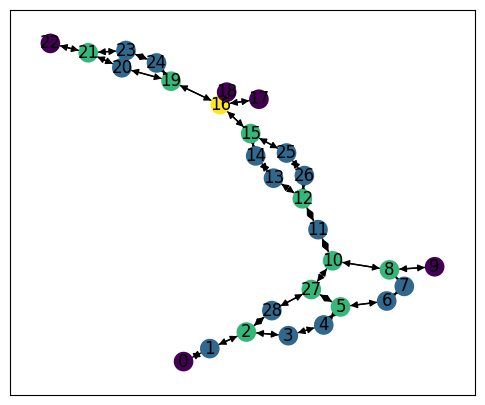

In [4]:
from torch_geometric.utils import from_networkx, to_networkx
from torch_geometric.data import Data, Batch
edge_index = batch.edge_index
num_nodes = batch.num_nodes
subgraph_edge_index = batch.subgraph_edge_index
subgraph_num_nodes = batch.subgraph_node_idx.shape[0]
G = to_networkx(Data(edge_index=edge_index, num_nodes=num_nodes))
# subgraph = to_networkx(Data(edge_index=subgraph_edge_index, num_nodes=subgraph_num_nodes))

plot_nx_graph(G)
# plot_nx_graph(subgraph)


In [ ]:
# dealing with subgraphs
from graphgps.layer.subgraph_mask_encoder import get_subgraph_idx, get_root_idx, get_node_idx, get_transpose_idx
